In [1]:
from tb_log_reader import LogReader
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Read TF logs

In [2]:
! ls tensorboard_logs

brats17_2d_1_lr_0.001_epochs_50
brats17_2d_2_lr_0.001_epochs_50
brats17_2d_3_lr_0.001_epochs_50
brats17_2d_4_lr_0.001_epochs_50
brats17_2d_5_lr_0.001_epochs_50
brats17_2d_no_val_1_lr_0.001_epochs_50
brats17_2d_no_val_2_lr_0.001_epochs_50
brats17_2d_no_val_3_lr_0.001_epochs_50
brats17_2d_no_val_4_lr_0.001_epochs_50
brats17_2d_no_val_5_lr_0.001_epochs_50
brats17_2d_pre_1_lr_0.001_epochs_50
brats17_2d_pre_2_lr_0.001_epochs_50
brats17_2d_pre_3_lr_0.001_epochs_50
brats17_2d_pre_4_lr_0.001_epochs_50
brats17_2d_pre_5_lr_0.001_epochs_50
brats17_2d_pre_no_val_1_lr_0.001_epochs_50
brats17_2d_pre_no_val_2_lr_0.001_epochs_50
brats17_2d_pre_no_val_3_lr_0.001_epochs_50
brats17_2d_pre_no_val_4_lr_0.001_epochs_50
brats17_2d_pre_no_val_5_lr_0.001_epochs_50
brats17_3d_1_lr_0.001_epochs_50
brats17_3d_2_lr_0.001_epochs_50
brats17_3d_3_lr_0.001_epochs_50
brats17_3d_4_lr_0.001_epochs_50
brats17_3d_pre_1_lr_0.001_epochs_50
brats17_3d_pre_2_lr_0.001_epochs_50
brats17_3d_pre_3_lr_0.001_epochs_50
brats17_3d_pre

In [2]:
lr_no_pretr_val = []
lr_pretr_val = []

for i in range(5):
    lr_no_pretr = LogReader('tensorboard_logs/brats17_3d_{}_lr_0.001_epochs_50'.format(i+1))
    lr_no_pretr_events = lr_no_pretr.load_run(0, test=True)
    lr_no_pretr_val.append({
        'edema': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'edema'),
        'tumor_core': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'tumor_core'),
        'enhancing': lr_no_pretr.get_df_from_scalar(lr_no_pretr_events, 'enhancing')
    })
    
    lr_pretr = LogReader('tensorboard_logs/brats17_3d_pre_{}_lr_0.001_epochs_50'.format(i+1))
    lr_pretr_val_events = lr_pretr.load_run(0, test=True)
    lr_pretr_val.append({
        'edema': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'edema'),
        'tumor_core': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'tumor_core'),
        'enhancing': lr_pretr.get_df_from_scalar(lr_pretr_val_events, 'enhancing')
    })

In [3]:
sns.set_context("paper", rc={"xtick.labelsize":24, "ytick.labelsize":24, "axes.labelsize":24, "legend.fontsize": 24, "axes.titlesize": 24}) # ,"axes.titlesize":8,"axes.labelsize":5

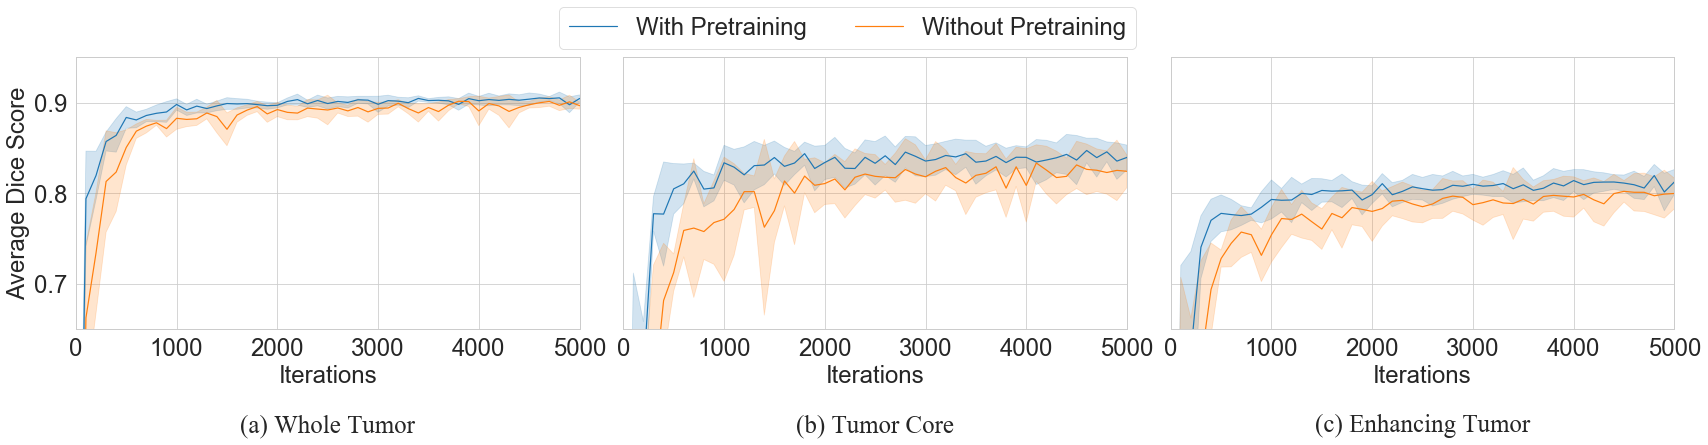

In [11]:
# 3D

label_dict = {
    'edema': '(a) Whole Tumor',
    'tumor_core': '(b) Tumor Core',
    'enhancing': '(c) Enhancing Tumor'
}

f, axes = plt.subplots(1, 3)
f.set_size_inches(24, 6)
# sns.despine(left=True)
sns.set_style("whitegrid")

for i_plot, tumor_region in enumerate(['edema', 'tumor_core', 'enhancing']):
    label = label_dict[tumor_region]

    df_no_pretr = pd.concat([lr_no_pretr_val[i][tumor_region][['steps', 'values']].iloc[:] for i in range(5)], axis=0)
    df_pretr = pd.concat([lr_pretr_val[i][tumor_region][['steps', 'values']].iloc[:] for i in range(5)], axis=0)

    df_no_pretr = df_no_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})
    df_pretr = df_pretr.rename(columns={"steps": "Iterations", "values": "Average Dice Score"})

    #idxs = lr_no_pretr_val[i]['tumor_core']['steps']
    #df_no_pretr = pd.concat([idxs, df_no_pretr], axis=1).set_index('steps')
    #df_pretr = pd.concat([idxs, df_pretr], axis=1).set_index('steps')
    # relplot
    f = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_pretr, markers=True, label='With Pretraining', ci='sd', legend=False, ax=axes[i_plot])
    g = sns.lineplot(x='Iterations', y='Average Dice Score', data=df_no_pretr, markers=True, label='Without Pretraining', ci='sd', legend=False, ax=axes[i_plot])
    f.set(ylim=(0.65, 0.95))
    g.set(ylim=(0.65, 0.95))
    f.set(xlim=(0, 5000))
    g.set(xlim=(0, 5000))
    axes[i_plot].title.set_text(label)
    axes[i_plot].title.set_y(-0.4)
    axes[i_plot].title.set_fontfamily('Times New Roman')
    axes[i_plot].title.set_fontsize(25)
    # axes[i_plot].title.set_fontserif('Times New Roman')
    # axes[i_plot].title.set_fontname('Times New Roman')
    # axes[i_plot].legend(loc='lower right')
    
    if i_plot > 0:
        #pass
        axes[i_plot].set_ylabel('')
        #axes[i_plot].get_yaxis().set_visible(False)
        axes[i_plot].set_yticklabels([''] * 7)

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout()
legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=2, bbox_to_anchor = (0,0.1,1,1), bbox_transform = plt.gcf().transFigure)

plt.savefig("figures/eval_progress.pdf", bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


In [12]:
import matplotlib.font_manager
matplotlib.font_manager.

pathlib.Path

In [13]:
matplotlib.__file__

'/home/jonas/anaconda3/envs/deep_avx/lib/python3.7/site-packages/matplotlib/__init__.py'

In [89]:
plt.savefig("figures/test.pdf")

<Figure size 432x288 with 0 Axes>

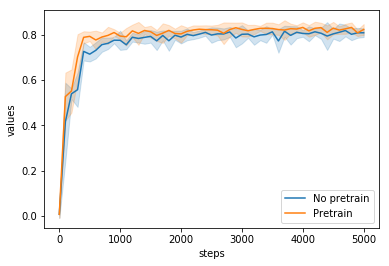

In [54]:
# 2D

df = pd.DataFrame()

df_no_pretr = pd.concat([lr_no_pretr_val[i]['tumor_core'] for i in range(5)]) # .iloc[:20]
df_pretr = pd.concat([lr_pretr_val[i]['tumor_core'] for i in range(5)]) # .iloc[:20]

# relplot

sns.lineplot(x='steps', y='values', data=df_no_pretr, markers=True, label='No pretrain', ci='sd')
sns.lineplot(x='steps', y='values', data=df_pretr, markers=True, label='Pretrain', ci='sd')

# for i in range(5):
    
    # sns.lineplot(x='steps', y='values', data=lr_no_pretr_val[i]['tumor_core'], dashes=True, markers=True)
    # sns.lineplot(x='steps', y='values', data=lr_pretr_val[i]['edema'], dashes=False, markers=True)


In [51]:
df_no_pretr.iloc[:20]

,steps,times,values
0,0,1.562968e+09,0.000000
1,100,1.562968e+09,0.365665
2,200,1.562968e+09,0.562719
3,300,1.562969e+09,0.664160
4,400,1.562969e+09,0.745093
5,500,1.562969e+09,0.766337
6,600,1.562970e+09,0.754804
7,700,1.562970e+09,0.788999
8,800,1.562970e+09,0.753629
9,900,1.562971e+09,0.788925


In [40]:
lr = LogReader('tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50')

In [41]:
train_events = lr.load_run(0, test=False)
test_events = lr.load_run(0, test=True)

INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/train/events.out.tfevents.1562769901.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/train/events.out.tfevents.1562769901.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


INFO:tensorflow:No path found after tensorboard_logs/brats17_2d_pre_5_lr_0.001_epochs_50/20190710-144501/test/events.out.tfevents.1562769902.py-notebook0-82327-prod


In [42]:
lr.get_available_scalars(train_events)

['edema', 'tumor_core', 'loss', 'enhancing']

In [43]:
lr.get_available_scalars(test_events)

['edema', 'enhancing', 'tumor_core', 'loss']

In [44]:
train_losses = lr.get_df_from_scalar(train_events, 'loss')
train_dices = lr.get_df_from_scalar(train_events, 'tumor_core')
test_losses = lr.get_df_from_scalar(test_events, 'loss')
test_dices = lr.get_df_from_scalar(test_events, 'tumor_core')

In [11]:
# fa: why is the train loss at the end of the training still so high, but accuracy is good?
train_losses.iloc[-1]

times     1.562523e+09
steps     9.900000e+01
values    1.198570e-02
Name: 99, dtype: float64

In [12]:
# backprop
train_losses.iloc[-1]

times     1.562523e+09
steps     9.900000e+01
values    1.198570e-02
Name: 99, dtype: float64

In [13]:
# backprop
train_dices.head()

,times,steps,values
0,1.562523e+09,99,0.193524


In [12]:
test_accuracies

,times,steps,values
0,1.554997e+09,938,80.980003
1,1.554998e+09,1876,87.239998
2,1.554998e+09,2814,87.360001
3,1.554998e+09,3752,91.290001
4,1.554998e+09,4690,90.720001
5,1.554998e+09,5628,89.800003
6,1.554998e+09,6566,92.870003
7,1.554998e+09,7504,90.809998
8,1.554998e+09,8442,92.040001
9,1.554998e+09,9380,93.720001


In [32]:
train_dices.iloc[-1]

steps     9.999000e+03
times     1.561642e+09
values    9.334302e-01
Name: 99, dtype: float64

In [16]:
train_losses.head()

,times,steps,values
0,1.562521e+09,0,0.013753
1,1.562521e+09,1,0.013669
2,1.562521e+09,2,0.013583
3,1.562521e+09,3,0.013447
4,1.562521e+09,4,0.013506


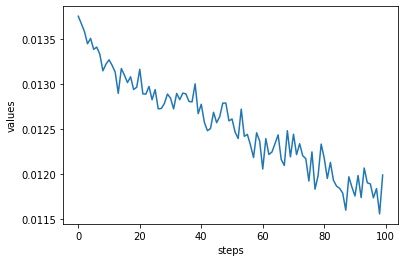

In [14]:
sns.lineplot(x='steps', y='values', data=train_losses)

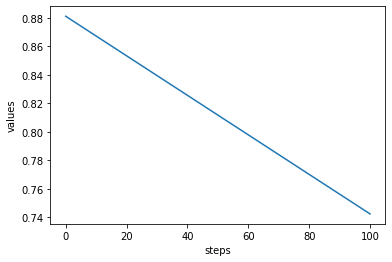

In [15]:
sns.lineplot(x='steps', y='values', data=test_losses)

In [10]:
train_dices.head()

,times,steps,values
0,1.562523e+09,99,0.193524


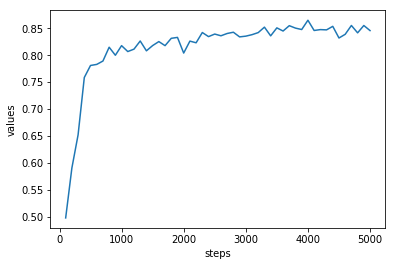

In [8]:
sns.lineplot(x='steps', y='values', data=train_dices)

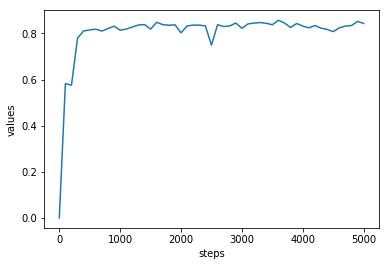

In [9]:
sns.lineplot(x='steps', y='values', data=test_dices)

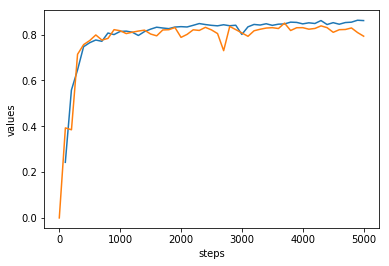

In [45]:
sns.lineplot(x='steps', y='values', data=train_dices)
sns.lineplot(x='steps', y='values', data=test_dices)

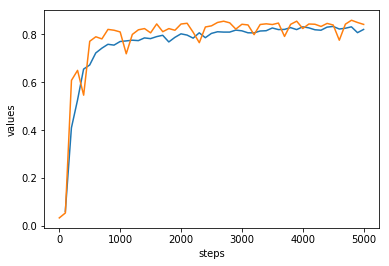

In [20]:
sns.lineplot(x='steps', y='values', data=train_dices)
sns.lineplot(x='steps', y='values', data=test_dices)

In [25]:
test_dices.iloc[-1]

steps     5.000000e+03
times     1.562633e+09
values    8.248324e-01
Name: 50, dtype: float64

In [21]:
test_dices.iloc[-1]

steps     5.000000e+03
times     1.562680e+09
values    8.416548e-01
Name: 50, dtype: float64

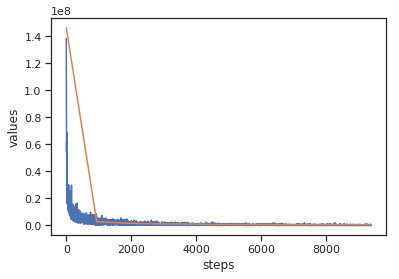

In [15]:
sns.lineplot(x='steps', y='values', data=train_losses)
sns.lineplot(x='steps', y='values', data=test_losses)